In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"Fertilizer.csv")

In [5]:
df.head()

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37,0,0,Urea
1,12,0,36,DAP
2,7,9,30,Fourteen-Thirty Five-Fourteen
3,22,0,20,Twenty Eight-Twenty Eight
4,35,0,0,Urea


1. **(Urea)**: Contains 37% Nitrogen, 0% Potassium, and 0% Phosphorous.
2. **(DAP)**: It contains 12% Nitrogen, 0% Potassium, and 36% Phosphorous.
3. **(Fourteen-Thirty Five-Fourteen)**: It contains 7% Nitrogen, 9% Potassium, and 30% Phosphorous.
4. **(Twenty Eight-Twenty Eight)**: It contains 22% Nitrogen, 0% Potassium, and 20% Phosphorous.
5. **(Urea)**: Similar to Row 0, it contains 35% Nitrogen, 0% Potassium, and 0% Phosphorous.

In [7]:
df.describe()

,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000
mean,18.909091,3.383838,18.606061
std,11.599693,5.814667,13.476978
min,4.000000,0.000000,0.000000
25%,10.000000,0.000000,9.000000
50%,13.000000,0.000000,19.000000
75%,24.000000,7.500000,30.000000
max,42.000000,19.000000,42.000000


In [9]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', 'Fourteen-Thirty Five-Fourteen',
       'Twenty Eight-Twenty Eight', 'Seventeen-Seventeen-Seventeen',
       'Twenty-Twenty', 'Ten-Twenty Six-Twenty Six'], dtype=object)

In [11]:
# Basic information about the dataset
print(df.info())

# Statistical summary of the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Nitrogen         99 non-null     int64 
 1   Potassium        99 non-null     int64 
 2   Phosphorous      99 non-null     int64 
 3   Fertilizer Name  99 non-null     object
dtypes: int64(3), object(1)
memory usage: 3.2+ KB
None
        Nitrogen  Potassium  Phosphorous
count  99.000000  99.000000    99.000000
mean   18.909091   3.383838    18.606061
std    11.599693   5.814667    13.476978
min     4.000000   0.000000     0.000000
25%    10.000000   0.000000     9.000000
50%    13.000000   0.000000    19.000000
75%    24.000000   7.500000    30.000000
max    42.000000  19.000000    42.000000


<Axes: xlabel='Fertilizer Name', ylabel='count'>

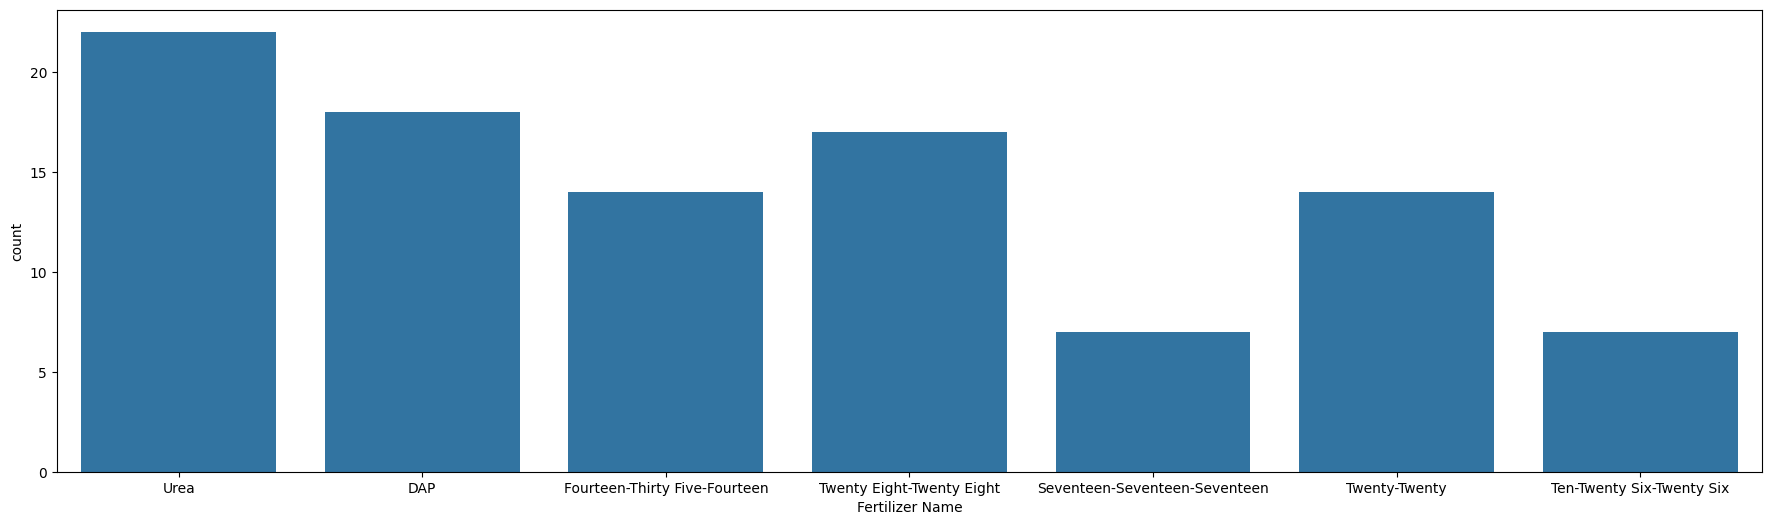

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,6))
sns.countplot(x='Fertilizer Name', data = df)

In [19]:
corr = df.drop(columns=['Fertilizer Name']).corr()
corr

,Nitrogen,Potassium,Phosphorous
Nitrogen,1.000000,-0.500087,-0.686971
Potassium,-0.500087,1.000000,0.089192
Phosphorous,-0.686971,0.089192,1.000000


<Axes: >

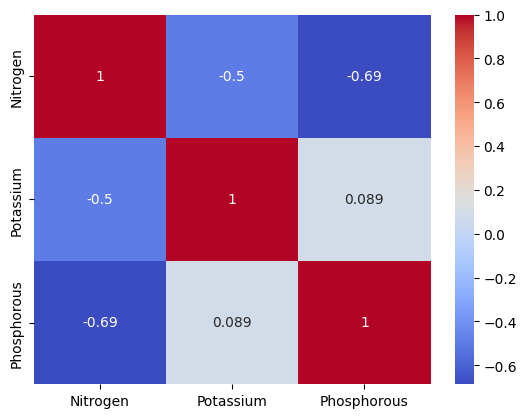

In [21]:
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm')

In [37]:
from sklearn.preprocessing import LabelEncoder
encode_ferti = LabelEncoder()
df['Fertilizer Name']=encode_ferti.fit_transform(df['Fertilizer Name'])
#creating the dataframe
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['original','Encoded'])
Fertilizer = Fertilizer.set_index('original')
Fertilizer

,Encoded
original,
DAP,0
Fourteen-Thirty Five-Fourteen,1
Seventeen-Seventeen-Seventeen,2
Ten-Twenty Six-Twenty Six,3
Twenty Eight-Twenty Eight,4
Twenty-Twenty,5
Urea,6


In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Fertilizer Name']),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 3), y_train = (79,), x_test = (20, 3), y_test = (20,)


In [41]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79 entries, 2 to 37
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Nitrogen     79 non-null     int64
 1   Potassium    79 non-null     int64
 2   Phosphorous  79 non-null     int64
dtypes: int64(3)
memory usage: 2.5 KB


In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test)  # Use the same transformation on test data


In [45]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(x_train, y_train)  # Train the model


RandomForestClassifier(random_state=42)

In [47]:
y_pred = classifier.predict(x_test)

In [51]:
# Evaluate the Model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


## Export model to Pickle file

In [55]:
import pickle
pickle_out = open('random_forest_model_new.pkl', 'wb')
pickle.dump(classifier,pickle_out)
pickle_out.close()